# Start

In [1]:
import pandas as pd
xls = pd.ExcelFile('Judgment2.xlsx')
df_screen = pd.read_excel(xls, 'Screen')
df_a = pd.read_excel(xls, 'a')
df_b = pd.read_excel(xls, 'b')
df_c = pd.read_excel(xls, 'c')

In [2]:
df_screen = df_screen.dropna()

In [3]:
df_screen['fldSResponse'] = df_screen['fldSResponse'].apply(lambda s: s.lower())

In [4]:
df_screen

,fldSResponse,fldSIsPassed
0,call mom and tell her she is stranded and send...,1.0
1,buy a ticket home,0.0
2,find a cash machine,0.0
3,make a phone call,1.0
4,"call someone, her husband.",1.0
...,...,...
821,try to find something to eat,0.0
822,try to find someone who had more money,0.0
823,make a phone call (p) see if i knew someone in...,0.0
824,call someone for help (p) tell them i was stra...,0.0


In [5]:
df_screen["fldSResponse"] = df_screen["fldSResponse"].str.replace("\(p\)", ",")
df_screen["fldSResponse"] = df_screen["fldSResponse"].str.replace("\(q\)", ",")
df_screen["fldSResponse"] = df_screen["fldSResponse"].str.replace(" q ", ",")
df_screen["fldSResponse"] = df_screen["fldSResponse"].str.replace(" p ", ",")
df_screen["fldSResponse"] = df_screen["fldSResponse"].str.replace("\(\)", ",")

/var/folders/nh/bqvjwbm11q39ckgjc3_j5_h80000gn/T/ipykernel_46052/1102155550.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_screen["fldSResponse"] = df_screen["fldSResponse"].str.replace("\(p\)", ",")
/var/folders/nh/bqvjwbm11q39ckgjc3_j5_h80000gn/T/ipykernel_46052/1102155550.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_screen["fldSResponse"] = df_screen["fldSResponse"].str.replace("\(q\)", ",")
/var/folders/nh/bqvjwbm11q39ckgjc3_j5_h80000gn/T/ipykernel_46052/1102155550.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_screen["fldSResponse"] = df_screen["fldSResponse"].str.replace("\(\)", ",")


In [6]:
df_screen

,fldSResponse,fldSIsPassed
0,call mom and tell her she is stranded and send...,1.0
1,buy a ticket home,0.0
2,find a cash machine,0.0
3,make a phone call,1.0
4,"call someone, her husband.",1.0
...,...,...
821,try to find something to eat,0.0
822,try to find someone who had more money,0.0
823,"make a phone call , see if i knew someone in t...",0.0
824,"call someone for help , tell them i was strand...",0.0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_screen["fldSResponse"], df_screen["fldSIsPassed"], test_size = 0.05)

/home/parastoo/miniconda3/envs/myenv/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [8]:
X_train

42                               i would call the police
262                                           cry -,- dk
92     go to travelers aid. i would make a telephone ...
355                          call somebody , come get me
157                                        hitch a ride.
                             ...                        
391    say "help! help!" stand in the middle of the a...
160                                       start walking.
473    go and ask for a glass of water , get some cra...
185    go to the main desk... tell them what happened...
272    look in phone book to find someone i know,try ...
Name: fldSResponse, Length: 784, dtype: object

In [9]:
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [10]:
X_train

,fldSResponse
42,i would call the police
262,"cry -,- dk"
92,go to travelers aid. i would make a telephone ...
355,"call somebody , come get me"
157,hitch a ride.
...,...
391,"say ""help! help!"" stand in the middle of the a..."
160,start walking.
473,"go and ask for a glass of water , get some cra..."
185,go to the main desk... tell them what happened...


In [11]:
y_train

,fldSIsPassed
42,1.0
262,0.0
92,1.0
355,0.0
157,0.0
...,...
391,0.0
160,0.0
473,0.0
185,0.0


In [12]:
#X_train_backup, X_test_backup, y_train_back_up, y_test_backup = X_train, X_test, y_train, y_test

In [13]:
#X_train, X_test, y_train, y_test = X_train_backup, X_test_backup, y_train_back_up, y_test_backup

In [14]:
#from sentence_transformers import SentenceTransformer
#bert_model = SentenceTransformer('saved_models/bert.pb')

In [15]:
import torch
from scipy.spatial.distance import cosine
from transformers import AutoModel, AutoTokenizer


def embed(texts):
    # Import our models. The package will take care of downloading the models automatically
    tokenizer = AutoTokenizer.from_pretrained("princeton-nlp/sup-simcse-roberta-large")
    model = AutoModel.from_pretrained("princeton-nlp/sup-simcse-roberta-large")

    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

    # Get the embeddings
    with torch.no_grad():
        embeddings = model(**inputs, output_hidden_states=True, return_dict=True).pooler_output

    return embeddings

In [16]:
#from sentence_transformers import SentenceTransformer
#bert_model2 = SentenceTransformer('distilbert-base-uncased')

In [17]:
#import tensorflow_hub as hub

#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [18]:
lst_X_train = X_train['fldSResponse'].tolist()
#X_train_embedding_tensor = bert_model.encode(lst_X_train, convert_to_tensor=True)
X_train_embedding_tensor = embed(lst_X_train)

In [19]:
X_train_embeddings = []

for e in X_train_embedding_tensor:
    X_train_embeddings.append(e.tolist())

In [20]:
df_X_train_embeddings = pd.DataFrame(columns=['fldSResponse'])
df_X_train_embeddings['fldSResponse'] = X_train_embedding_tensor.squeeze().tolist()

In [21]:
df_X_train_embeddings

,fldSResponse
0,"[-0.631592333316803, -0.26562607288360596, 0.4..."
1,"[-0.5919755101203918, -0.4642444849014282, 0.0..."
2,"[-0.09628454595804214, -0.1569906771183014, 0...."
3,"[-0.7327377796173096, -0.7049050331115723, -0...."
4,"[0.5074214339256287, -0.6415902972221375, -0.1..."
...,...
779,"[-0.12206078320741653, -0.8148605823516846, 0...."
780,"[0.08377835899591446, -0.6910518407821655, 0.2..."
781,"[0.6343774199485779, -0.4989088177680969, -0.3..."
782,"[-0.16054914891719818, -0.8411523103713989, 0...."


In [22]:
#X_train_embeddings = []
#for e in X_train_embedding_tensor:
#    X_train_embeddings.append(list(e))

In [23]:
#df_X_train_embeddings = pd.DataFrame(out, columns=["fldSResponse"])

In [24]:
lst_X_test = X_test['fldSResponse'].tolist()
#X_test_embedding_tensor = bert_model.encode(lst_X_test, convert_to_tensor=True)
X_test_embedding_tensor = embed(lst_X_test)

In [25]:
X_test_embeddings = []

for e in X_test_embedding_tensor:
    X_test_embeddings.append(e.tolist())

In [26]:
df_X_test_embeddings = pd.DataFrame(columns=['fldSResponse'])
df_X_test_embeddings['fldSResponse'] = X_test_embedding_tensor.squeeze().tolist()

In [27]:
df_X_test_embeddings

,fldSResponse
0,"[0.024058228358626366, -0.8745591640472412, 0...."
1,"[0.01263162400573492, -0.8510416746139526, 0.2..."
2,"[-0.10450049489736557, 0.09893166273832321, -0..."
3,"[-0.18817314505577087, -0.7248643636703491, 0...."
4,"[-0.6914100646972656, -0.5201022624969482, -0...."
5,"[-0.3277975022792816, 0.0030220355838537216, -..."
6,"[-0.3102119565010071, 0.4721035957336426, -0.4..."
7,"[-0.7927888035774231, -0.45587846636772156, 0...."
8,"[0.4695298969745636, 0.03089992329478264, -0.1..."
9,"[0.030138768255710602, -0.24352197349071503, -..."


In [28]:
#X_test_embeddings = []
#for e in X_test_embedding_tensor:
#    X_test_embeddings.append(list(e))

In [29]:
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()

In [30]:
X_train_embeddings_backup, X_test_embeddings_backup = X_train_embeddings, X_test_embeddings

In [31]:
type(X_train_embeddings_backup)

list

In [32]:
X_train_embeddings_backup = pd.DataFrame(X_train_embeddings_backup)
X_test_embeddings_backup = pd.DataFrame(X_test_embeddings_backup)

In [33]:
import numpy as np

In [34]:
X_train_embeddings = np.array(X_train_embeddings)
X_test_embeddings = np.array(X_test_embeddings)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [35]:
def binary_focal_loss(gamma=0.1, alpha=0.5):

    def binary_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred:  A tensor resulting from a sigmoid
        :return: Output tensor.
        """
        y_true = tf.cast(y_true, tf.float32)
        # Define epsilon so that the back-propagation will not result in NaN for 0 divisor case
        epsilon = K.epsilon()
        # Add the epsilon to prediction value
        # y_pred = y_pred + epsilon
        # Clip the prediciton value
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        # Calculate p_t
        p_t = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        # Calculate alpha_t
        alpha_factor = K.ones_like(y_true) * alpha
        alpha_t = tf.where(K.equal(y_true, 1), alpha_factor, 1 - alpha_factor)
        # Calculate cross entropy
        cross_entropy = -K.log(p_t)
        weight = alpha_t * K.pow((1 - p_t), gamma)
        # Calculate focal loss
        loss = weight * cross_entropy
        # Sum the losses in mini_batch
        loss = K.mean(K.sum(loss, axis=1))
        return loss

    return binary_focal_loss_fixed

In [42]:
import ast 
import boto3
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
from datetime import date, timedelta
import datetime
import numpy
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import tensorflow as tf
import tensorflow.keras
from sklearn.preprocessing import LabelBinarizer


histories = []
preds = []

checkpoint_filepath = './tmp/checkpoint-4'
model_checkpoint_callback = ModelCheckpoint(
      filepath=checkpoint_filepath,
      monitor='val_loss', #val_binary_accuracy
      verbose=1,
      save_best_only=True)

for batch in [16, 32, 64, 128]:  
  
    inputs =Input(shape=(len(X_train_embeddings[0]),))
    model = Dense(64, activation='relu')(inputs)
    model = Dropout(0.2)(model)
    model = Dense(32, activation='tanh')(model)
    model = Dropout(0.2)(model)
    output = Dense(1, activation='sigmoid')(model)
    model = Model(inputs, output)

    opt = tensorflow.keras.optimizers.Adam(learning_rate=5e-4)

    model.compile(
    loss = [binary_focal_loss()],
    optimizer = opt,
    metrics = ['binary_accuracy']
    )
    history = model.fit(X_train_embeddings, y_train, epochs = 100 , batch_size=batch,validation_data=(X_test_embeddings, y_test),callbacks=[model_checkpoint_callback], shuffle = True)
    histories.append(history)

2023-04-07 11:30:52.934053: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 11:30:53.647831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100


2023-04-07 11:30:54.584056: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


48/49 [============================>.] - ETA: 0s - loss: 0.2151 - binary_accuracy: 0.7852
Epoch 1: val_loss improved from inf to 0.14121, saving model to ./tmp/checkpoint-4


2023-04-07 11:30:55.761931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:55.771802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-07 11:30:55.888568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:55

INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


49/49 [==============================] - 1s 18ms/step - loss: 0.2125 - binary_accuracy: 0.7883 - val_loss: 0.1412 - val_binary_accuracy: 0.8571
Epoch 2/100
38/49 [======================>.......] - ETA: 0s - loss: 0.1702 - binary_accuracy: 0.8487
Epoch 2: val_loss improved from 0.14121 to 0.13460, saving model to ./tmp/checkpoint-4


2023-04-07 11:30:56.426725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:56.436509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-07 11:30:56.530994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:56

INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


49/49 [==============================] - 1s 12ms/step - loss: 0.1665 - binary_accuracy: 0.8508 - val_loss: 0.1346 - val_binary_accuracy: 0.8810
Epoch 3/100
38/49 [======================>.......] - ETA: 0s - loss: 0.1576 - binary_accuracy: 0.8717
Epoch 3: val_loss improved from 0.13460 to 0.12711, saving model to ./tmp/checkpoint-4


2023-04-07 11:30:57.039832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:57.049815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-07 11:30:57.145590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:57

INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


49/49 [==============================] - 1s 13ms/step - loss: 0.1500 - binary_accuracy: 0.8839 - val_loss: 0.1271 - val_binary_accuracy: 0.8810
Epoch 4/100
37/49 [=====================>........] - ETA: 0s - loss: 0.1366 - binary_accuracy: 0.8936
Epoch 4: val_loss improved from 0.12711 to 0.12409, saving model to ./tmp/checkpoint-4


2023-04-07 11:30:57.643508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:57.653059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-07 11:30:57.746902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:57

INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


49/49 [==============================] - 1s 12ms/step - loss: 0.1385 - binary_accuracy: 0.8890 - val_loss: 0.1241 - val_binary_accuracy: 0.8810
Epoch 5/100
37/49 [=====================>........] - ETA: 0s - loss: 0.1401 - binary_accuracy: 0.8834
Epoch 5: val_loss improved from 0.12409 to 0.11647, saving model to ./tmp/checkpoint-4


2023-04-07 11:30:58.245487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:58.255213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-07 11:30:58.349767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:58

INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


49/49 [==============================] - 1s 17ms/step - loss: 0.1357 - binary_accuracy: 0.8852 - val_loss: 0.1165 - val_binary_accuracy: 0.9048
Epoch 6/100
40/49 [=======================>......] - ETA: 0s - loss: 0.1229 - binary_accuracy: 0.9078
Epoch 6: val_loss improved from 0.11647 to 0.11309, saving model to ./tmp/checkpoint-4


2023-04-07 11:30:59.097648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:59.107519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-07 11:30:59.200558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:30:59

INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


49/49 [==============================] - 1s 13ms/step - loss: 0.1258 - binary_accuracy: 0.9056 - val_loss: 0.1131 - val_binary_accuracy: 0.8810
Epoch 7/100
37/49 [=====================>........] - ETA: 0s - loss: 0.1064 - binary_accuracy: 0.9206
Epoch 7: val_loss did not improve from 0.11309
49/49 [==============================] - 0s 4ms/step - loss: 0.1085 - binary_accuracy: 0.9145 - val_loss: 0.1254 - val_binary_accuracy: 0.9048
Epoch 8/100
47/49 [===========================>..] - ETA: 0s - loss: 0.1028 - binary_accuracy: 0.9215
Epoch 8: val_loss did not improve from 0.11309
49/49 [==============================] - 0s 4ms/step - loss: 0.1019 - binary_accuracy: 0.9222 - val_loss: 0.1274 - val_binary_accuracy: 0.8810
Epoch 9/100
46/49 [===========================>..] - ETA: 0s - loss: 0.0969 - binary_accuracy: 0.9293
Epoch 9: val_loss did not improve from 0.11309
49/49 [==============================] - 0s 4ms/step - loss: 0.0968 - binary_accuracy: 0.9286 - val_loss: 0.1320 - val_bina

2023-04-07 11:31:00.570571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:31:00.580525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-07 11:31:00.675988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-07 11:31:00

INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


INFO:tensorflow:Assets written to: ./tmp/checkpoint-4/assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0862 - binary_accuracy: 0.9349 - val_loss: 0.0997 - val_binary_accuracy: 0.9048
Epoch 12/100
37/49 [=====================>........] - ETA: 0s - loss: 0.0785 - binary_accuracy: 0.9443
Epoch 12: val_loss did not improve from 0.09970
49/49 [==============================] - 0s 4ms/step - loss: 0.0799 - binary_accuracy: 0.9413 - val_loss: 0.1545 - val_binary_accuracy: 0.8333
Epoch 13/100
46/49 [===========================>..] - ETA: 0s - loss: 0.0752 - binary_accuracy: 0.9443
Epoch 13: val_loss did not improve from 0.09970
49/49 [==============================] - 0s 4ms/step - loss: 0.0723 - binary_accuracy: 0.9477 - val_loss: 0.1351 - val_binary_accuracy: 0.8810
Epoch 14/100
46/49 [===========================>..] - ETA: 0s - loss: 0.0675 - binary_accuracy: 0.9497
Epoch 14: val_loss did not improve from 0.09970
49/49 [==============================] - 0s 4ms/step - loss: 0.0684 - binary_accuracy: 0.9503 - val_loss: 0.1190 - va


KeyboardInterrupt



In [41]:
!pip install tensorflow

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.2 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 9.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requiremen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 10.7 MB/s eta 0:00:0000:0100:01
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439678 sha256=2ee315be2c4489ebc54f073825a110219c559eea3ef7fba5cc21c88ddc7887de
  Stored in directory: /home/parastoo/.cache/pip/wheels/05/94/dc/81042da9bced43ff430bc02043d213d9e4b210b584c39e31c1
Successfully built jax
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstall: numpy


In [209]:
# in code 300 ta model deep learning ro train mikone ba batch size hA va epoc haye mokhtalf va to motuni in model ro azin be bad estefade koni 

In [210]:
import keras
model = keras.models.load_model('./tmp/checkpoint-4/', custom_objects={'binary_focal_loss_fixed': binary_focal_loss()})

In [211]:
pred = model.predict(X_test_embeddings)

In [212]:
thresh=0.5

<AxesSubplot:ylabel='Count'>

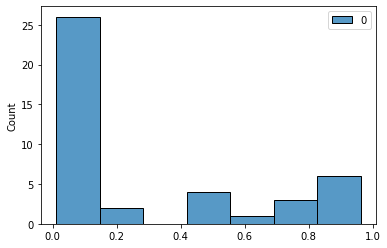

In [213]:
import seaborn as sns
sns.histplot(pred)

In [214]:
pred_sigm= [1 if pred_ > thresh else 0 for pred_ in pred]

In [172]:
print(classification_report(y_test,pred_sigm))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        33
         1.0       0.88      0.78      0.82         9

    accuracy                           0.93        42
   macro avg       0.91      0.87      0.89        42
weighted avg       0.93      0.93      0.93        42



In [156]:
confusion_matrix(y_test,pred_sigm)

array([[33,  0],
       [ 5,  4]])

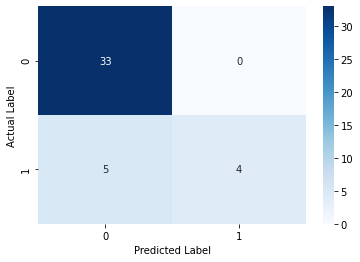

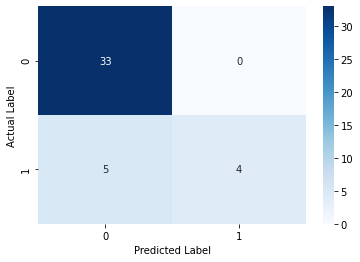

In [157]:
fig, ax = plt.subplots()
#sns.heatmap(confusion_matrix(pred_soft[:,1], y_test_label[:,1]), annot= True)
sns.heatmap(confusion_matrix(y_test,pred_sigm),cmap="Blues", annot= True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
display(fig)

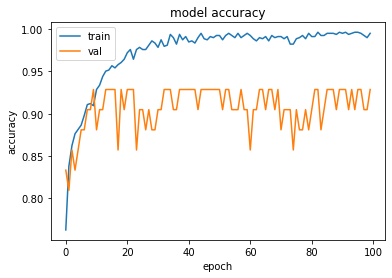

None

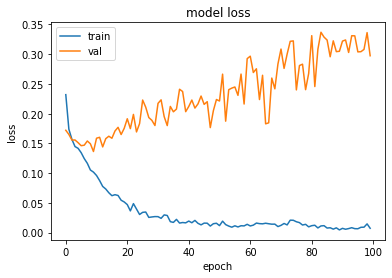

None

In [158]:
plt.plot(histories[0].history['binary_accuracy'])
plt.plot(histories[0].history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
display(plt.show())
# summarize history for loss
plt.plot(histories[0].history['loss'])
plt.plot(histories[0].history['val_loss'])
plt.title('model loss')            



plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
display(plt.show())